### Credit Risk Analysis 
Loan Default Prediction: whether a Customer is going to default on his loan payments or not.

In [138]:
import pandas as pd
import numpy as np


In [186]:
df = pd.read_csv('credit_data.csv')
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


In [140]:
df['default'].value_counts()

default
1    700
2    300
Name: count, dtype: int64

There is a mix of features available, like categorical variables such as 'purpose', 'other_debtors', 'foreign_worker', 'job' and continous varibales like 'age', 'months_loan_duration', 'amount'. Also, the 'default' varibale contains the information of whether the person has defaulted or not, so for Machine Learning task, this column is our Target Variable.

#### Problem with dataset
The main problem with this dataset is that it did not have any metadata, also the label descriptions are unavailable at the source, that is why we do not know if the lable = 1 implies 'Defaulted' or 'Not Defaulted'. However, for simple ML modelling and optimization of model, often there is no strict requirement of label description, but we will try to make an educated guess to go ahead with the further analysis.

In [141]:
print('Average Loan Amount taken by people labelled 1 is: ' ,df[df['default'] == 1]['amount'].mean(), end='\n')
print()
print('Average Loan Amount taken by people labelled 2 is: ' ,df[df['default'] == 2]['amount'].mean(), end= '\n')

Average Loan Amount taken by people labelled 1 is:  2985.457142857143

Average Loan Amount taken by people labelled 2 is:  3938.1266666666666


In [142]:
# Calculate total samples for each default class
total_default_1 = df[df['default'] == 1].shape[0]
total_default_2 = df[df['default'] == 2].shape[0]

# Calculate frequency and percentage for each credit_history category
credit_history_default_1 = df[df['default'] == 1]['credit_history'].value_counts()
credit_history_default_2 = df[df['default'] == 2]['credit_history'].value_counts()

percentage_default_1 = (credit_history_default_1 / total_default_1) * 100
percentage_default_2 = (credit_history_default_2 / total_default_2) * 100

print('Percentage of credit histories of people labelled 1\n\n', percentage_default_1)
print('\nPercentage of credit histories of people labelled 2\n\n', percentage_default_2)


Percentage of credit histories of people labelled 1

 credit_history
repaid                    51.571429
critical                  34.714286
delayed                    8.571429
fully repaid this bank     3.000000
fully repaid               2.142857
Name: count, dtype: float64

Percentage of credit histories of people labelled 2

 credit_history
repaid                    56.333333
critical                  16.666667
delayed                    9.333333
fully repaid this bank     9.333333
fully repaid               8.333333
Name: count, dtype: float64


#### Inferences from Analysis
##### Label 1:

- Higher Critical Credit Histories: A significant portion (34.71%) of people labeled 1 have a critical credit history.
- Lower Fully Repaid Percentages: Lower percentages in "fully repaid this bank" (3.00%) and "fully repaid" (2.14%) categories.
- Lower Average Loan Amount: The average loan amount is lower compared to label 2.
##### Label 2:

- Higher Repaid Percentages: A higher portion (56.33%) of people labeled 2 have repaid their loans.
- Lower Critical Credit Histories: Only 16.67% have a critical credit history, significantly lower than label 1.
- Higher Fully Repaid Percentages: Higher percentages in "fully repaid this bank" (9.33%) and "fully repaid" (8.33%) categories.
- Higher Average Loan Amount: The average loan amount is higher compared to label 1.

##### Conclusion for Label Descriptions:
- Label 1 (Higher Risk or Default): Given the higher percentage of critical credit histories and lower percentages of fully repaid categories, along with a lower average loan amount, label 1 likely represents individuals with a higher risk of default or those who have defaulted.

- Label 2 (Lower Risk or No Default): With higher percentages of repaid categories and lower critical credit histories, along with a higher average loan amount, label 2 likely represents individuals with a lower risk of default or those who have not defaulted.
So, Going ahead we will consider this:

#### Label 1: Defaulted or Higher Risk Borrowers
#### Label 2: Not Defaulted or Lower Risk Borrowers

In [143]:
# checking for missing values
df.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_length       0
installment_rate        0
personal_status         0
other_debtors           0
residence_history       0
property                0
age                     0
installment_plan        0
housing                 0
existing_credits        0
default                 0
dependents              0
telephone               0
foreign_worker          0
job                     0
dtype: int64

In [144]:
df.info() # checking dtypes of columns for consistency of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_length     1000 non-null   object
 7   installment_rate      1000 non-null   int64 
 8   personal_status       1000 non-null   object
 9   other_debtors         1000 non-null   object
 10  residence_history     1000 non-null   int64 
 11  property              1000 non-null   object
 12  age                   1000 non-null   int64 
 13  installment_plan      1000 non-null   object
 14  housing               1000 non-null   object
 15  existing_credits      1000 non-null   i

In [145]:
df.columns

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_length', 'installment_rate',
       'personal_status', 'other_debtors', 'residence_history', 'property',
       'age', 'installment_plan', 'housing', 'existing_credits', 'default',
       'dependents', 'telephone', 'foreign_worker', 'job'],
      dtype='object')

In [146]:
# making a list of all the categorical columns
cat_col = ['checking_balance', 'credit_history', 'purpose', 'savings_balance', 'employment_length',
           'personal_status', 'other_debtors', 'property', 'installment_plan', 'housing', 'telephone',
           'foreign_worker', 'job']

In [147]:
for col in cat_col:
    print(df[col].value_counts())
    print()


checking_balance
unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: count, dtype: int64

credit_history
repaid                    530
critical                  293
delayed                    88
fully repaid this bank     49
fully repaid               40
Name: count, dtype: int64

purpose
radio/tv               280
car (new)              234
furniture              181
car (used)             103
business                97
education               50
repairs                 22
domestic appliances     12
others                  12
retraining               9
Name: count, dtype: int64

savings_balance
< 100 DM         603
unknown          183
101 - 500 DM     103
501 - 1000 DM     63
> 1000 DM         48
Name: count, dtype: int64

employment_length
1 - 4 yrs     339
> 7 yrs       253
4 - 7 yrs     174
0 - 1 yrs     172
unemployed     62
Name: count, dtype: int64

personal_status
single male      548
female           310
married male      92
divorced male     50
Name

As we can see: 
- 'checking_balance' has 394 unknown entries out of total 1000 data points, so instead of dropping the rows corresponding to the missing values, we shall drop the entire column from analysis.
- 'savings_balance' also has 183 unknown, so that needs to be taken care of
- Rest of the other categorical variables looks okay, meaning that we can get ahead and use get_dummies() method on them directly and proceed further for analysis.

In [148]:
del df['checking_balance'] 
del df['savings_balance']
df.columns

Index(['months_loan_duration', 'credit_history', 'purpose', 'amount',
       'employment_length', 'installment_rate', 'personal_status',
       'other_debtors', 'residence_history', 'property', 'age',
       'installment_plan', 'housing', 'existing_credits', 'default',
       'dependents', 'telephone', 'foreign_worker', 'job'],
      dtype='object')

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns

#### PLotting Categorical Features against default class

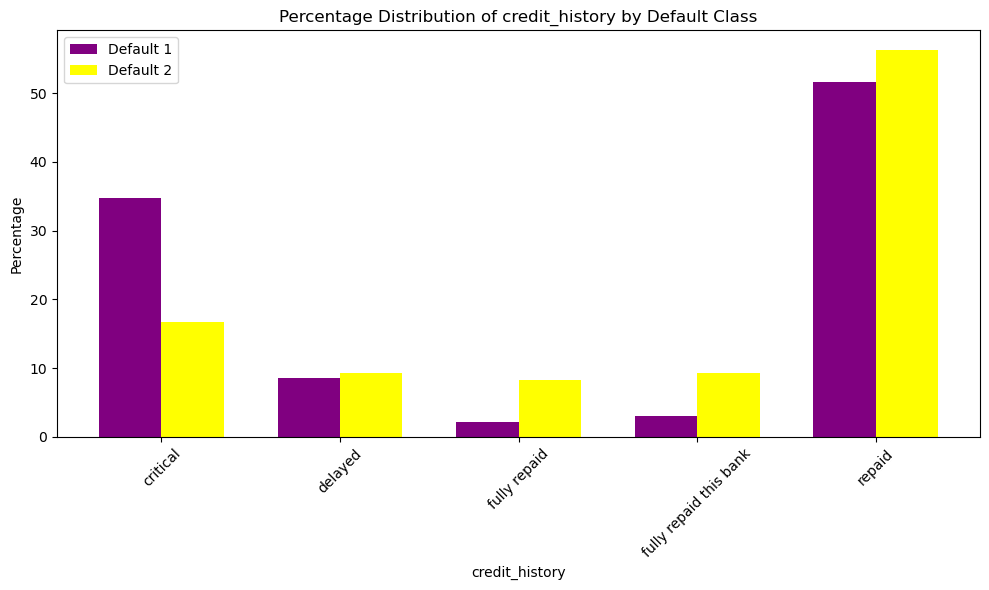

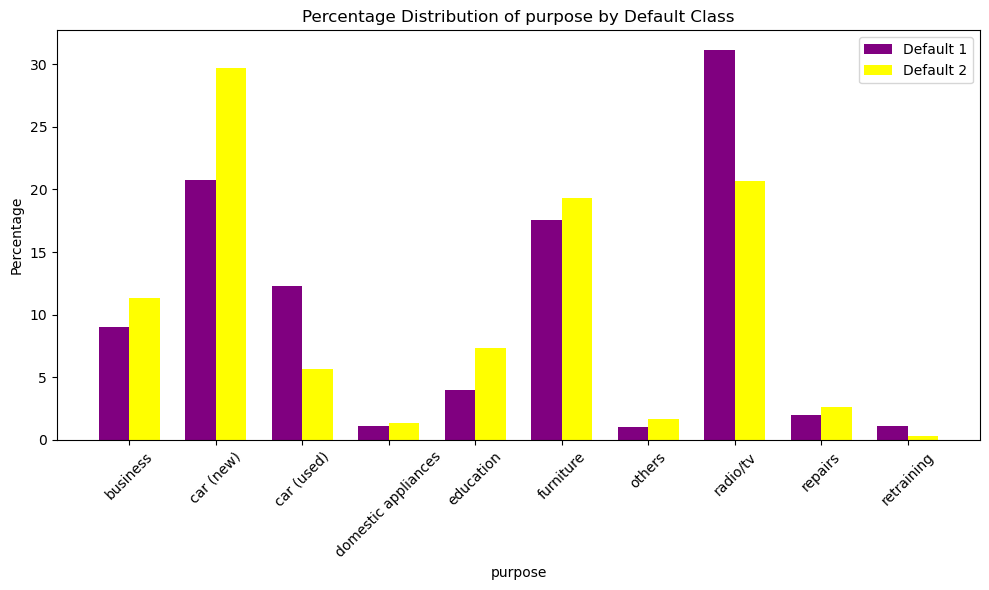

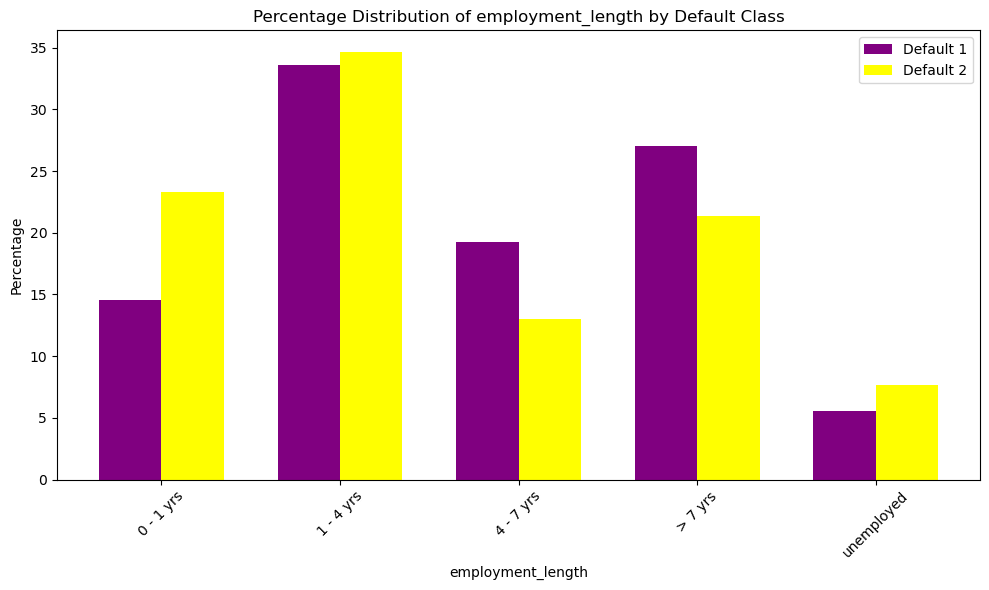

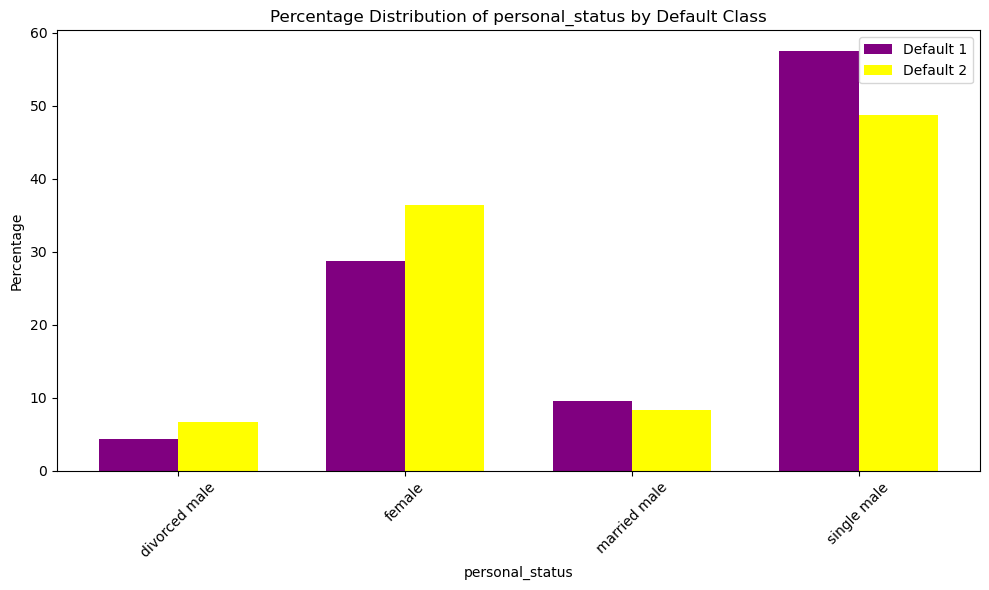

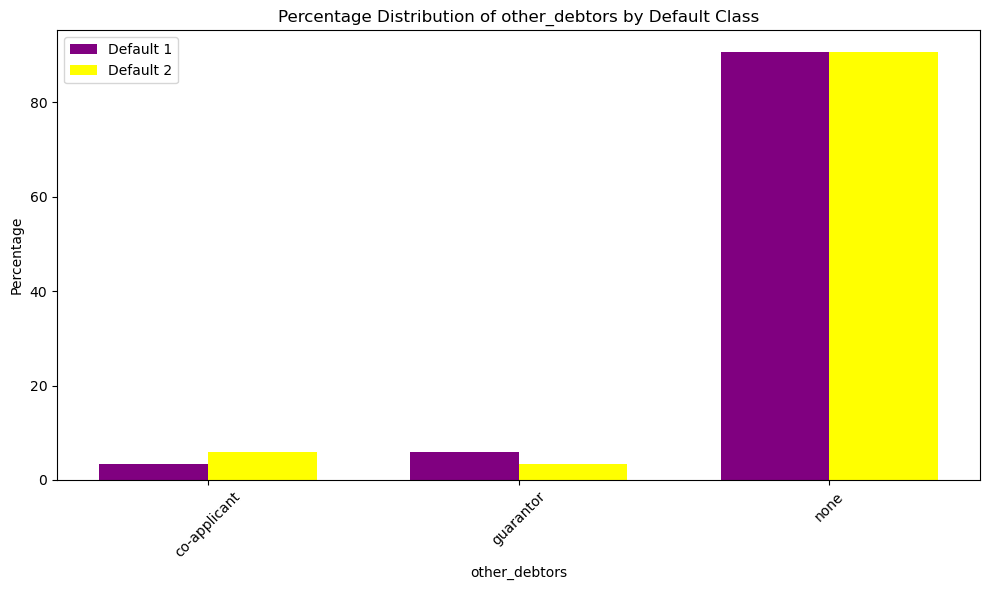

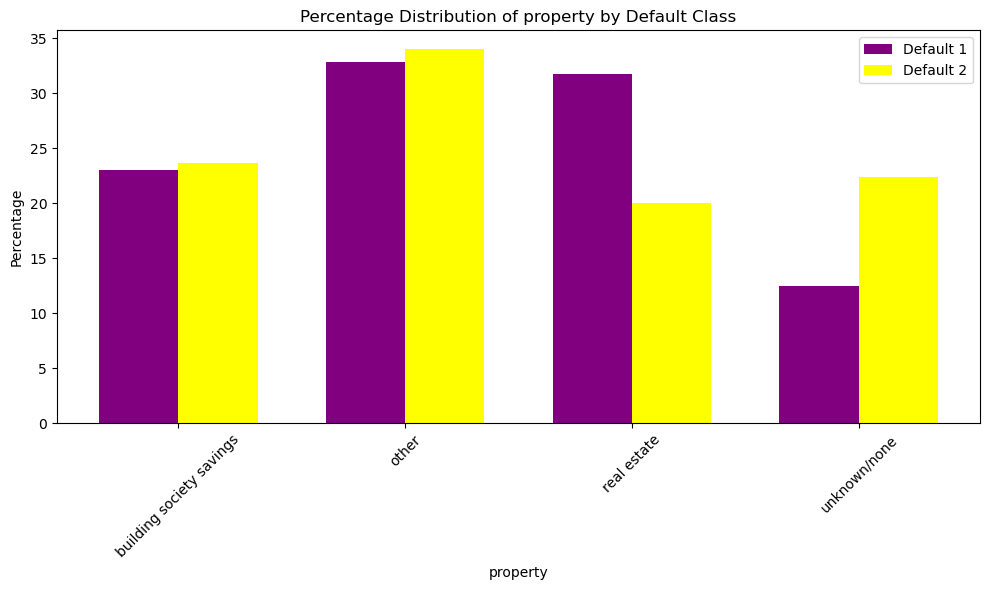

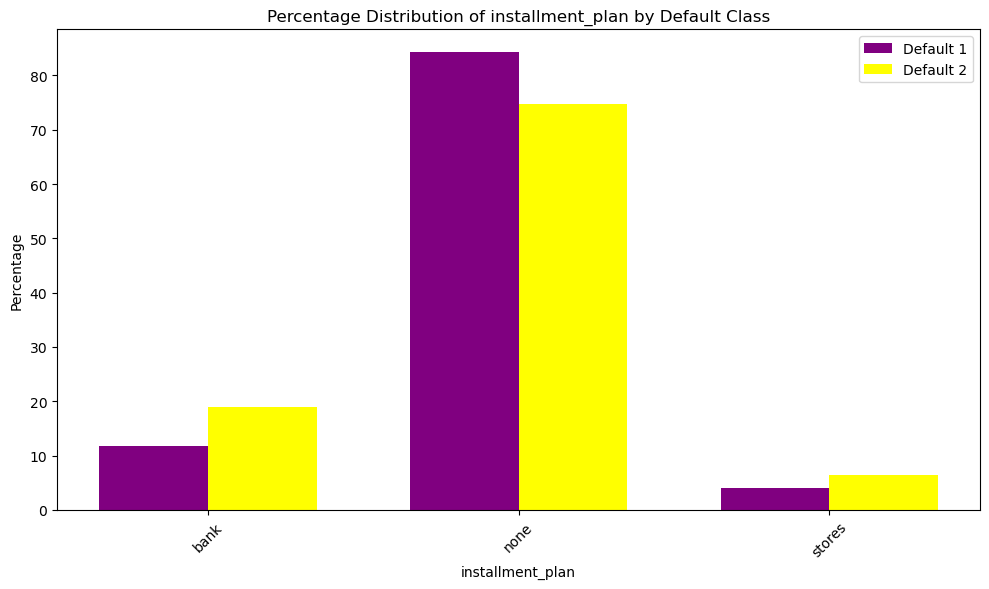

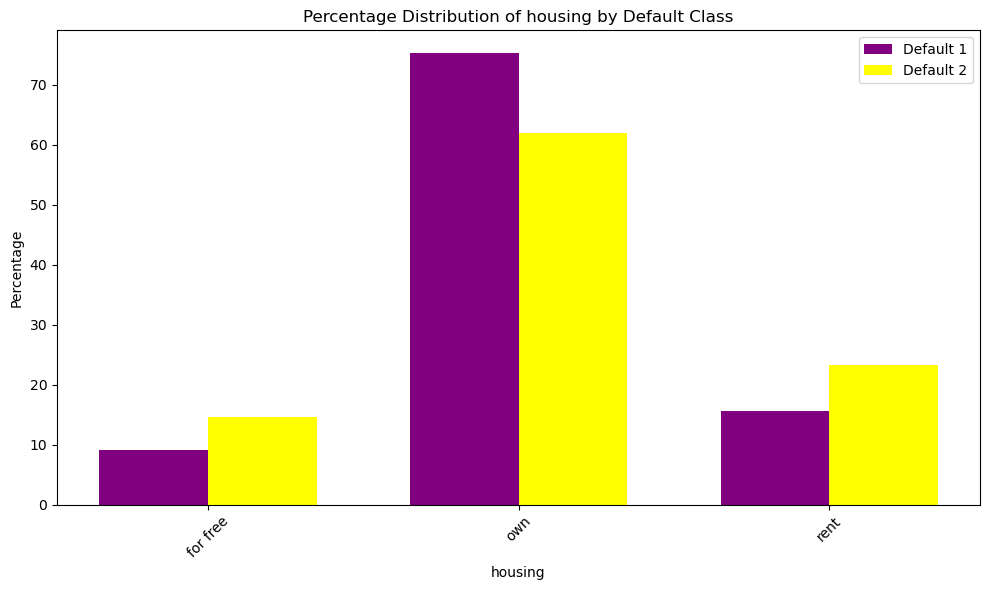

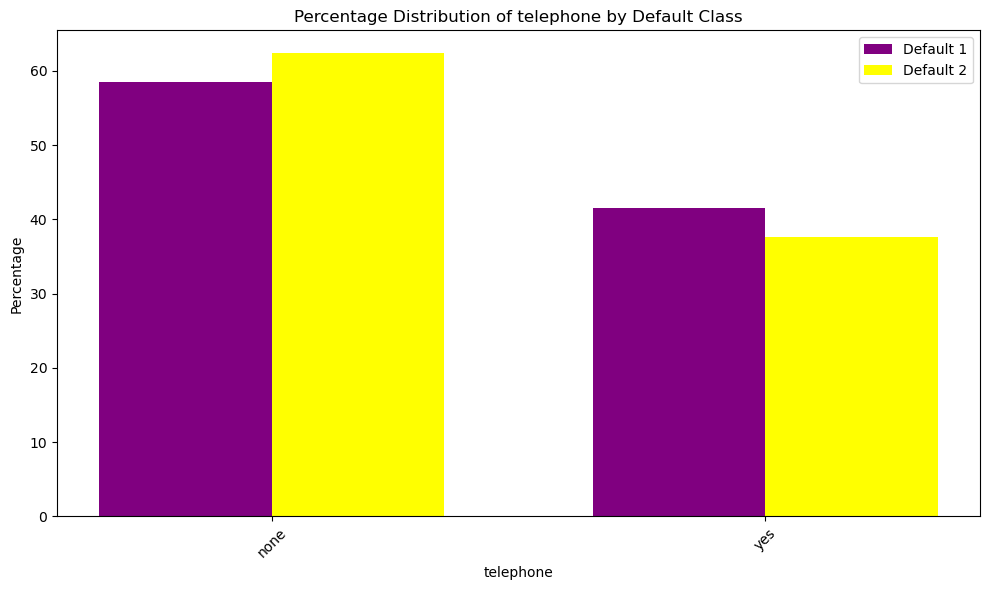

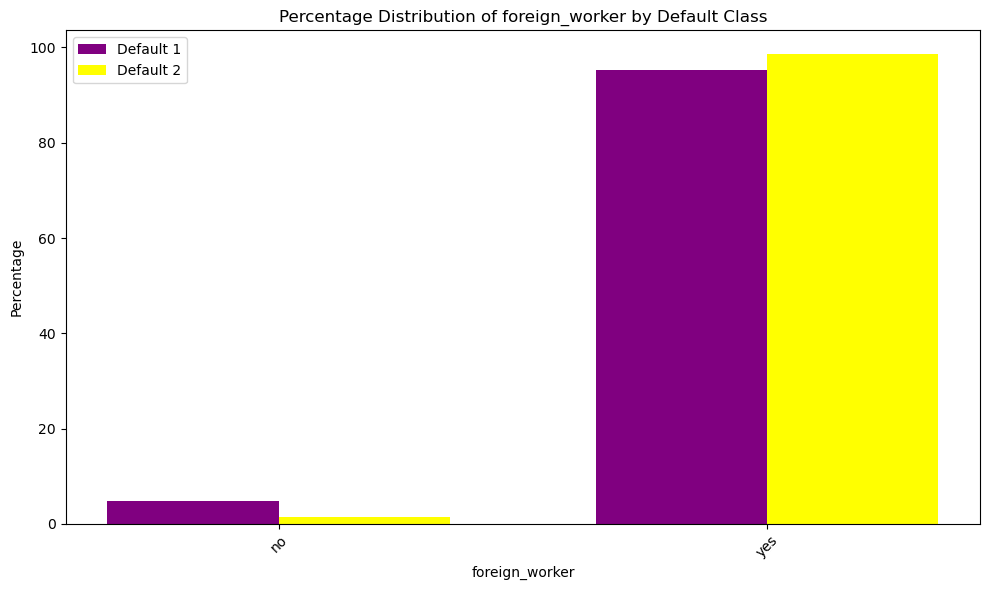

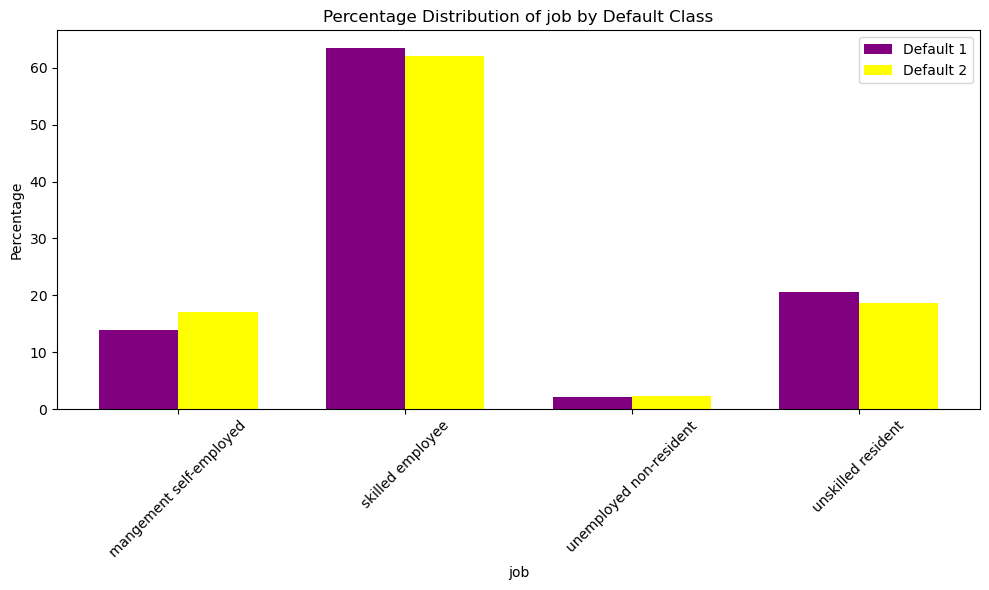

In [150]:
# List of categorical columns left
categorical_columns = ['credit_history', 'purpose', 'employment_length', 'personal_status',
                       'other_debtors', 'property', 'installment_plan', 'housing', 
                       'telephone', 'foreign_worker', 'job']

# Function to plot side-by-side bar plots
def plot_side_by_side(df, column):
    percentages = df.groupby('default')[column].value_counts(normalize=True).unstack() * 100
    fig, ax = plt.subplots(figsize=(10, 6))
    categories = percentages.columns
    default_1 = percentages.loc[1]
    default_2 = percentages.loc[2]
    bar_width = 0.35
    index = range(len(categories))
    
    bars1 = ax.bar(index, default_1, bar_width, label='Default 1', color='purple')
    bars2 = ax.bar([i + bar_width for i in index], default_2, bar_width, label='Default 2', color='yellow')
    
    ax.set_xlabel(column)
    ax.set_ylabel('Percentage')
    ax.set_title(f'Percentage Distribution of {column} by Default Class')
    ax.set_xticks([i + bar_width / 2 for i in index])
    ax.set_xticklabels(categories, rotation=45)
    ax.legend()
    
    plt.tight_layout()
    plt.show()

# Loop through each categorical column and create the plot
for column in categorical_columns:
    plot_side_by_side(df, column)


#### Plotting distribution of numerical features against default class

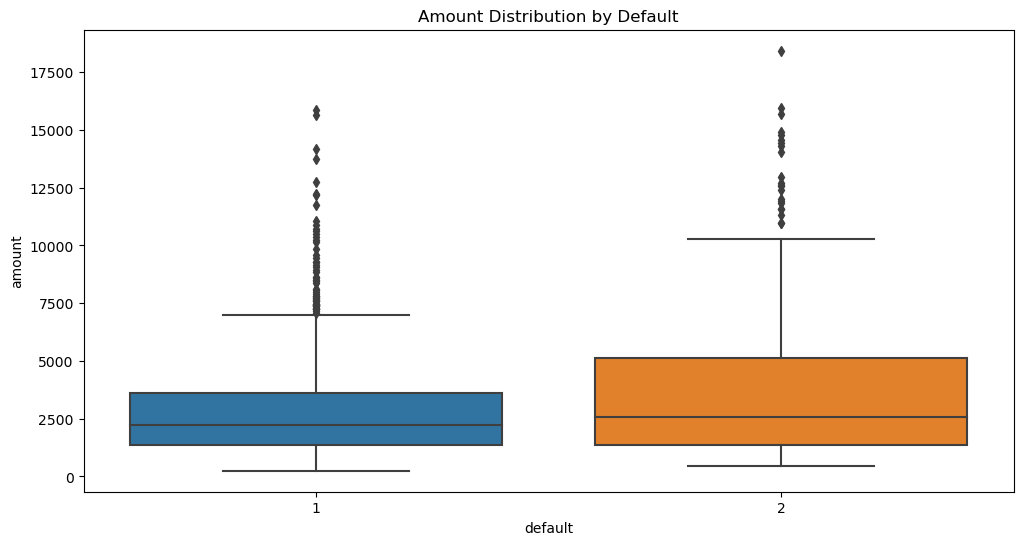

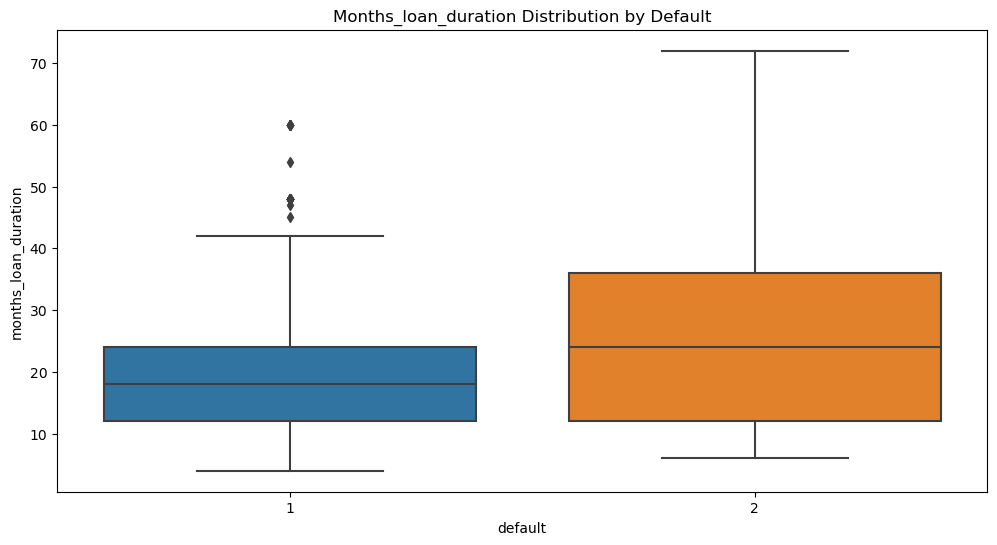

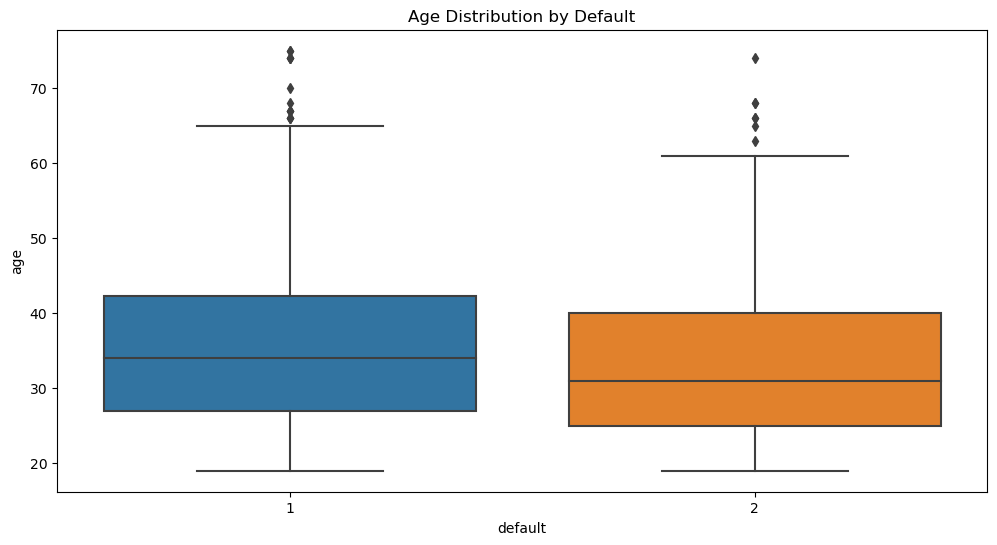

In [151]:
def plot_numerical_feature(feature, df):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='default', y=feature, data=df)
    plt.title(f'{feature.capitalize()} Distribution by Default')
    plt.show()

numerical_features = ['amount', 'months_loan_duration', 'age']

for feature in numerical_features:
    plot_numerical_feature(feature, df)


In [152]:
# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [153]:
df_encoded.head() # some are bool

,months_loan_duration,amount,installment_rate,residence_history,age,existing_credits,default,dependents,credit_history_delayed,credit_history_fully repaid,...,property_unknown/none,installment_plan_none,installment_plan_stores,housing_own,housing_rent,telephone_yes,foreign_worker_yes,job_skilled employee,job_unemployed non-resident,job_unskilled resident
0,6,1169,4,4,67,2,1,1,False,False,...,False,True,False,True,False,True,True,True,False,False
1,48,5951,2,2,22,1,2,1,False,False,...,False,True,False,True,False,False,True,True,False,False
2,12,2096,2,3,49,1,1,2,False,False,...,False,True,False,True,False,False,True,False,False,True
3,42,7882,2,4,45,1,1,2,False,False,...,False,True,False,False,False,False,True,True,False,False
4,24,4870,3,4,53,2,2,2,True,False,...,True,True,False,False,False,False,True,True,False,False


In [154]:
df_encoded = df_encoded.replace({True:1, False:0}) # Convert bool to int

In [155]:
df_encoded.dtypes # now all are int

months_loan_duration                     int64
amount                                   int64
installment_rate                         int64
residence_history                        int64
age                                      int64
existing_credits                         int64
default                                  int64
dependents                               int64
credit_history_delayed                   int64
credit_history_fully repaid              int64
credit_history_fully repaid this bank    int64
credit_history_repaid                    int64
purpose_car (new)                        int64
purpose_car (used)                       int64
purpose_domestic appliances              int64
purpose_education                        int64
purpose_furniture                        int64
purpose_others                           int64
purpose_radio/tv                         int64
purpose_repairs                          int64
purpose_retraining                       int64
employment_le

Defining Predictor Set

In [156]:
X = df_encoded.drop(columns='default', axis=1)

Defining Target class

In [157]:
y = df_encoded['default']

In [158]:
from sklearn.model_selection import train_test_split

Splitting the data into training and testing set

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state= 0)
print("Training set size:", X_train.shape, y_train.shape)
print()
print("Testing set size:", X_test.shape, y_test.shape)


Training set size: (800, 41) (800,)

Testing set size: (200, 41) (200,)


In [160]:
y_train = y_train.replace(2, 0)
y_test = y_test.replace(2, 0)
# Replacing 2 with 0 , which is common for binary classification

In [161]:
from sklearn.preprocessing import StandardScaler

Standardizing the Predictor set to have a mean of zero and std deviation of one

In [162]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

After standardizing

In [163]:
print('Mean of any random column in Predictor Set', X_train[:,5].mean())
print()
print('Standard Devaiation of any random column in Predictor Set', X_train[:,12].std())

Mean of any random column in Predictor Set 0.0

Standard Devaiation of any random column in Predictor Set 1.0


In [164]:
# To test the different parameters of model and find the best one
from sklearn.model_selection import GridSearchCV

In [165]:
from sklearn.linear_model import LogisticRegression

In [166]:
# Specifying parameter grid for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs'],
    'max_iter': [100, 200, 400]} 
# As this dataset seems sufficiently balanced, I am not using 'class_weight'

In [167]:
lr = LogisticRegression() # Instantiate the base model
lr_cv = GridSearchCV(lr, param_grid= param_grid, cv = 10, scoring= 'accuracy') # Setting up the grid search

In [168]:
lr_cv.fit(X_train, y_train) # Feeding data to the to the model for grid seach
# print best parameter set from grid
print("Tuned Hyperparamters: \n", lr_cv.best_params_)
# print the best accuracy score
print("Accuracy: ", lr_cv.best_score_)

Tuned Hyperparamters: 
 {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy:  0.7475


In [169]:
tuned_lr = lr_cv.best_estimator_
yhat_lr = tuned_lr.predict(X_test)

Calculating accuracy of the tuned_lr model on test data

In [170]:
# Calculate the accuracy on the test data
test_accuracy = tuned_lr.score(X_test, y_test)

# Print the accuracy
print("Test accuracy: ", test_accuracy)

Test accuracy:  0.7


In [171]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Plotting Confusion Matrix

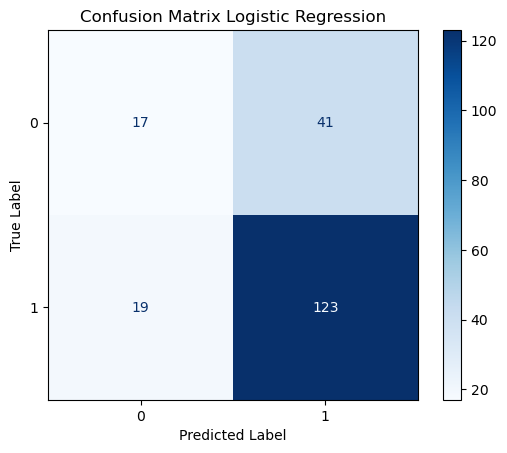

In [172]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, yhat_lr)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tuned_lr.classes_)
disp.plot(cmap=plt.cm.Blues)

# Add title and labels
plt.title("Confusion Matrix Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [173]:
print("Confusion Matrix of Logistic Regression\n\n", confusion_matrix(y_test, yhat_lr))

Confusion Matrix of Logistic Regression

 [[ 17  41]
 [ 19 123]]


In [174]:
from sklearn.tree import DecisionTreeClassifier

In [175]:
# setting up parameter grid for DEcision Tree
param_grid = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

In [176]:
dt = DecisionTreeClassifier() # Instantiate the base model
dt_cv = GridSearchCV(dt, param_grid= param_grid, cv = 10, scoring= 'accuracy') # Setting up the grid search
dt_cv.fit(X_train, y_train) # Feeding data to the to the model for grid seach
# print best parameter set from grid
print("Tuned Hyperparamters: \n", dt_cv.best_params_)
# print the best accuracy score
print("Accuracy: ", dt_cv.best_score_)

Tuned Hyperparamters: 
 {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Accuracy:  0.7212500000000001


c:\Users\DELL\miniconda3\envs\adiver\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\DELL\miniconda3\envs\adiver\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\DELL\miniconda3\envs\adiver\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\DELL\miniconda3\envs\adiver\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraint

In [177]:
tuned_dt = dt_cv.best_estimator_
yhat_dt = tuned_dt.predict(X_test)

# Calculate the accuracy on the test data
test_accuracy = tuned_dt.score(X_test, y_test)

# Print the accuracy
print("Test accuracy: ", test_accuracy)

Test accuracy:  0.685


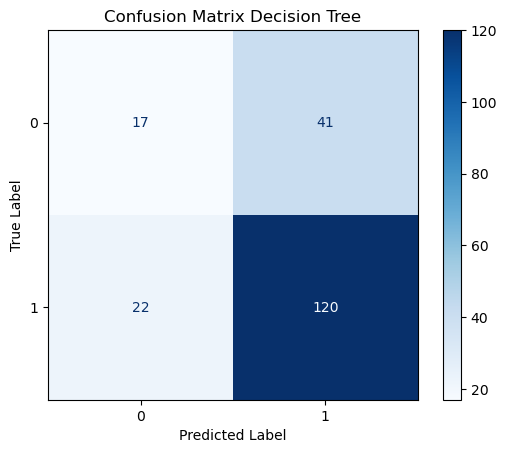

In [178]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, yhat_dt)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tuned_dt.classes_)
disp.plot(cmap=plt.cm.Blues)

# Add title and labels
plt.title("Confusion Matrix Decision Tree")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [179]:
print("Confusion Matrix of Decision Tree\n\n", confusion_matrix(y_test, yhat_dt))

Confusion Matrix of Decision Tree

 [[ 17  41]
 [ 22 120]]


Fitting 5 folds for each of 32 candidates, totalling 160 fits


c:\Users\DELL\miniconda3\envs\adiver\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
22 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\DELL\miniconda3\envs\adiver\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\DELL\miniconda3\envs\adiver\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\DELL\miniconda3\envs\adiver\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  

Tuned Hyperparameters: 
 {'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy:  0.7462500000000001
Test accuracy:  0.715


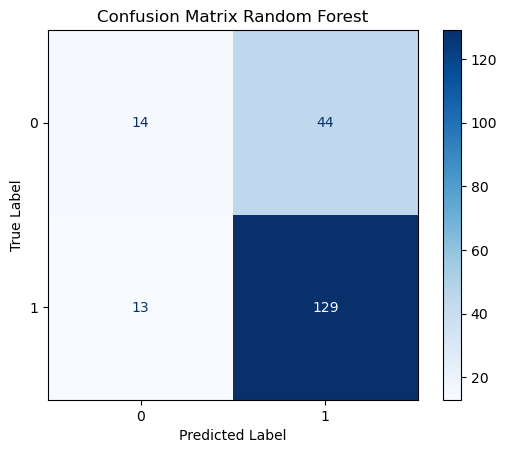

In [180]:
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}
# Instantiate the base model
rf = RandomForestClassifier()

# Set up GridSearchCV
rf_cv = GridSearchCV(rf, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit GridSearchCV
rf_cv.fit(X_train, y_train)

# Print best parameters and best score
print("Tuned Hyperparameters: \n", rf_cv.best_params_)
print("Accuracy: ", rf_cv.best_score_)

# Get the best estimator
tuned_rf = rf_cv.best_estimator_
yhat_rf = tuned_rf.predict(X_test)

# Calculate test accuracy
test_accuracy_rf = tuned_rf.score(X_test, y_test)
print("Test accuracy: ", test_accuracy_rf)

# Compute confusion matrix
cm_rf = confusion_matrix(y_test, yhat_rf)

# Display confusion matrix
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=tuned_rf.classes_)
disp_rf.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [181]:
print("Confusion Matrix of Random Forest\n\n", confusion_matrix(y_test, yhat_rf))

Confusion Matrix of Random Forest

 [[ 14  44]
 [ 13 129]]


Even though Random Forest is providing slightly higher accuracy but still the training time is increased very much and this is when the cross-validation was kept 5 instead of 10 as in earlier estimators

Since XGBoost takes 1 and 0 in Target class and here we have 1 and 2, so here I am replacing 2 for 0, which will represent the 'Not Defaulted (Good Credit)' class

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Tuned Hyperparameters: 
 {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Accuracy:  0.7475
Test accuracy:  0.69


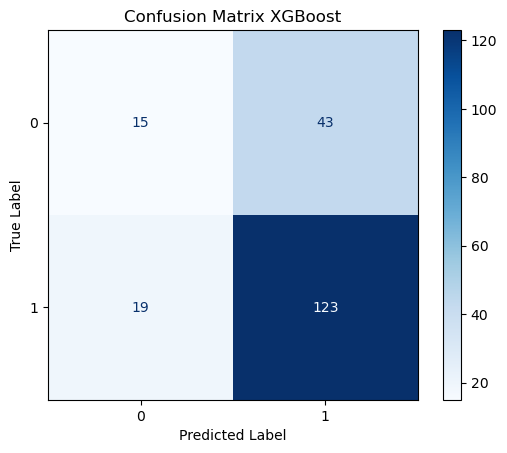

In [182]:
from xgboost import XGBClassifier

# Define parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Instantiate the base model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Set up GridSearchCV
xgb_cv = GridSearchCV(xgb, param_grid=param_grid_xgb, cv=10, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit GridSearchCV
xgb_cv.fit(X_train, y_train)

# Print best parameters and best score
print("Tuned Hyperparameters: \n", xgb_cv.best_params_)
print("Accuracy: ", xgb_cv.best_score_)

# Get the best estimator
tuned_xgb = xgb_cv.best_estimator_
yhat_xgb = tuned_xgb.predict(X_test)

# Calculate test accuracy
test_accuracy_xgb = tuned_xgb.score(X_test, y_test)
print("Test accuracy: ", test_accuracy_xgb)

# Compute confusion matrix
cm_xgb = confusion_matrix(y_test, yhat_xgb)

# Display confusion matrix
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=tuned_xgb.classes_)
disp_xgb.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix XGBoost")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [183]:
print("Confusion Matrix of XGBoost\n\n", confusion_matrix(y_test, yhat_xgb))

Confusion Matrix of XGBoost

 [[ 15  43]
 [ 19 123]]


In [184]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    'Logistic Regression': yhat_lr,
    'Decision Tree': yhat_dt,
    'Random Forest': yhat_rf,
    'XGBoost': yhat_xgb
}

# Loop through each model and calculate metrics
for model_name, y_pred in models.items():
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    
    # Print metrics
    print(f"{model_name} Metrics:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("\n") 

Logistic Regression Metrics:
Accuracy: 0.70
Precision: 0.75
Recall: 0.87
F1 Score: 0.80


Decision Tree Metrics:
Accuracy: 0.69
Precision: 0.75
Recall: 0.85
F1 Score: 0.79


Random Forest Metrics:
Accuracy: 0.71
Precision: 0.75
Recall: 0.91
F1 Score: 0.82


XGBoost Metrics:
Accuracy: 0.69
Precision: 0.74
Recall: 0.87
F1 Score: 0.80




Accuracy:
- Random Forest has the highest accuracy (0.71), followed closely by Logistic Regression and XGBoost (0.69).
- Decision Tree has the lowest accuracy (0.69), but only slightly lower than the others.

Precision:
- Random Forest has the highest precision (0.76), indicating it has the lowest false positive rate.
- Decision Tree has the lowest precision (0.71), meaning it has a higher false positive rate compared to the others.

Recall:
- Decision Tree has the highest recall (0.94), indicating it has the lowest false negative rate.
- Logistic Regression, Random Forest, and XGBoost all have similar recall values (0.87).

F1 Score:
- Logistic Regression, Decision Tree, and Random Forest all have an F1 score of 0.81, showing a good balance between precision and recall.
- XGBoost has a slightly lower F1 score (0.80).

The similar performance across different algorithms suggests that the problem might be well-suited to classification in general, with no one model having a significant edge. This can be due to the dataset's characteristics, effective regularization, balanced class distribution, and good hyperparameter tuning.